In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train-labels-idx1-ubyte', 't10k-labels-idx1-ubyte', 't10k-images-idx3-ubyte', 'train-images-idx3-ubyte', 'fashion-mnist_train.csv', 'fashion-mnist_test.csv']


# Andre Ofsoski 1314669
# Reece Breebart 1314828

In [2]:
['fashion-mnist_test.csv']


['fashion-mnist_test.csv']

In [3]:
['fashion-mnist_train.csv']

['fashion-mnist_train.csv']

In [4]:
test = pd.read_csv('../input/fashion-mnist_test.csv', dtype=int)
# fill blank entries
test = test.fillna(0)
X_test = test.drop('label', axis=1)
y_test = test['label']

test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [5]:
train = pd.read_csv('../input/fashion-mnist_train.csv', dtype=int)
# fill blank entries
train = train.fillna(0)
X_train = train.drop('label', axis=1)
y_train = train['label']

train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


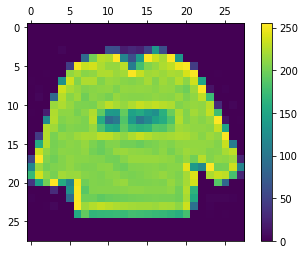

In [6]:
from matplotlib import pyplot as plt
m1=X_train[0:1].values.reshape(28,28)
def plot_matrix(m):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    cax = ax.matshow(m)
    ax.set_aspect('equal')
    fig.colorbar(cax)
    plt.show()
     
     
plot_matrix(m1)


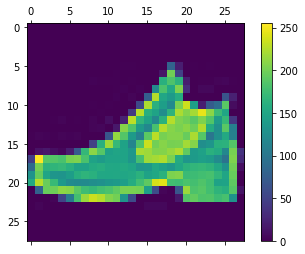

In [7]:
m2=X_train[1:2].values.reshape(28,28)
plot_matrix(m2)

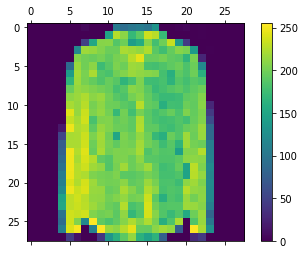

In [8]:
m2=X_train[2:3].values.reshape(28,28)
plot_matrix(m2)

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
clf=GaussianNB()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(accuracy_score(y_test,y_pred))

0.5914


In [10]:
from sklearn.ensemble import RandomForestClassifier
import itertools

max_features = [1,4,16,64,'auto'] 
max_depth = [1,4,16,64,None]

combo=list(itertools.product(max_features, max_depth))

def grid_search(CLF, X_train, y_train, n):
    highest_oob = 0;
    highest_features = 0;
    highest_depth = 0;
    for c in combo:
        #initialise the classifier, setting the oob_score and the bootstrap flag
        clf=CLF(n_estimators=n,max_depth=c[1],max_features=c[0], n_jobs=-1, bootstrap=True, oob_score=True, random_state=1314669)
        #train classifier
        clf.fit(X_train,y_train)
        # retrieve the oob score
        oob = clf.oob_score_        
        if oob >= highest_oob:
            highest_oob = oob
            highest_features = c[0]
            highest_depth = c[1]
            
        # print max_depth, max_features, and oob score
        print ("OOB score: ",oob," Max Features: ",c[0]," Max Depth: ",c[1])
    # return the highest oob score and the respective max_depth and max_features values
    print ("***** Highest OOB score:",highest_oob," Max Features: ",highest_features," Max Depth: ",highest_depth," *****")

In [11]:
grid_search(RandomForestClassifier, X_train, y_train, 30)

OOB score:  0.46323333333333333  Max Features:  1  Max Depth:  1
OOB score:  0.6624166666666667  Max Features:  1  Max Depth:  4
OOB score:  0.8056  Max Features:  1  Max Depth:  16
OOB score:  0.8222166666666667  Max Features:  1  Max Depth:  64
OOB score:  0.8222166666666667  Max Features:  1  Max Depth:  None
OOB score:  0.45088333333333336  Max Features:  4  Max Depth:  1
OOB score:  0.7066833333333333  Max Features:  4  Max Depth:  4
OOB score:  0.8407333333333333  Max Features:  4  Max Depth:  16
OOB score:  0.8427166666666667  Max Features:  4  Max Depth:  64
OOB score:  0.8427166666666667  Max Features:  4  Max Depth:  None
OOB score:  0.38503333333333334  Max Features:  16  Max Depth:  1
OOB score:  0.7331833333333333  Max Features:  16  Max Depth:  4
OOB score:  0.8588666666666667  Max Features:  16  Max Depth:  16
OOB score:  0.8579166666666667  Max Features:  16  Max Depth:  64
OOB score:  0.8579166666666667  Max Features:  16  Max Depth:  None
OOB score:  0.243033333333333

In [12]:
#train classifier with best hyperparameters
rnd_clf=RandomForestClassifier(n_estimators=30,max_depth=16,max_features=64, n_jobs=-1, oob_score=True, random_state=1314669)
rnd_clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=16, max_features=64, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
            oob_score=True, random_state=1314669, verbose=0,
            warm_start=False)

In [13]:
#compute and print accuracy for test set
from sklearn.metrics import accuracy_score 
y_pred=rnd_clf.predict(X_test)
print(y_pred)
accuracy = rnd_clf.score(X_test, y_test)
print("Accuracy: ",accuracy)

[0 1 2 ... 8 8 2]
Accuracy:  0.877


In [14]:
#confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[848   0  14  32   2   0  89   0  15   0]
 [  4 969   4  16   2   1   4   0   0   0]
 [ 12   2 797   8 120   0  54   0   7   0]
 [ 23   6  10 915  30   0  15   0   1   0]
 [  0   0  67  26 863   0  40   0   4   0]
 [  1   0   0   0   0 941   0  39   5  14]
 [174   0 107  28  82   0 594   0  15   0]
 [  0   0   0   0   0  12   0 924   1  63]
 [  2   1  10   1   3   1   7   2 972   1]
 [  0   0   0   0   0   5   1  44   3 947]]


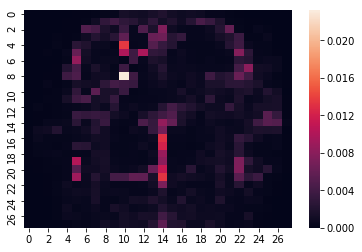

In [15]:
#feature importances
#imp_vals = importances.reshape(28,28)
#plot_matrix(imp_vals)

import seaborn as sns
importances = rnd_clf.feature_importances_
sns.heatmap(importances.reshape(28,28))
plt.show()

In [16]:
#extra trees with n estimators 30
from sklearn.ensemble import ExtraTreesClassifier
grid_search(ExtraTreesClassifier, X_train, y_train, 30)

OOB score:  0.39615  Max Features:  1  Max Depth:  1
OOB score:  0.5922  Max Features:  1  Max Depth:  4
OOB score:  0.7566  Max Features:  1  Max Depth:  16
OOB score:  0.79905  Max Features:  1  Max Depth:  64
OOB score:  0.7977166666666666  Max Features:  1  Max Depth:  None
OOB score:  0.47435  Max Features:  4  Max Depth:  1
OOB score:  0.6697166666666666  Max Features:  4  Max Depth:  4
OOB score:  0.8133666666666667  Max Features:  4  Max Depth:  16
OOB score:  0.82305  Max Features:  4  Max Depth:  64
OOB score:  0.82305  Max Features:  4  Max Depth:  None
OOB score:  0.4446833333333333  Max Features:  16  Max Depth:  1
OOB score:  0.71065  Max Features:  16  Max Depth:  4
OOB score:  0.8433  Max Features:  16  Max Depth:  16
OOB score:  0.8448333333333333  Max Features:  16  Max Depth:  64
OOB score:  0.8448333333333333  Max Features:  16  Max Depth:  None
OOB score:  0.34255  Max Features:  64  Max Depth:  1
OOB score:  0.7287333333333333  Max Features:  64  Max Depth:  4
OOB

In [17]:
extra_clf=ExtraTreesClassifier(n_estimators=30,max_depth=16,max_features=64, n_jobs=-1, random_state=1314669)
extra_clf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=16, max_features=64, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=-1,
           oob_score=False, random_state=1314669, verbose=0,
           warm_start=False)

In [18]:
#compute and print accuracy for test set
extra_pred=extra_clf.predict(X_test)
print(extra_pred)
accuracy2 = extra_clf.score(X_test, y_test)
print("Accuracy: ",accuracy2)

[0 1 2 ... 8 8 2]
Accuracy:  0.8746


In [19]:
#confusion matrix
print(confusion_matrix(y_test, extra_pred))

[[856   0  15  30   1   1  85   0  12   0]
 [  2 967   5  20   1   1   3   0   1   0]
 [ 12   1 786  10 125   0  59   0   7   0]
 [ 22   5  10 917  31   0  14   0   1   0]
 [  0   1  69  32 848   0  47   0   3   0]
 [  0   0   0   1   0 933   1  44   5  16]
 [170   1 115  30  75   0 591   0  18   0]
 [  0   0   0   0   0  14   0 925   0  61]
 [  2   1   7   1   5   2   4   2 976   0]
 [  0   0   0   0   0   7   0  45   1 947]]


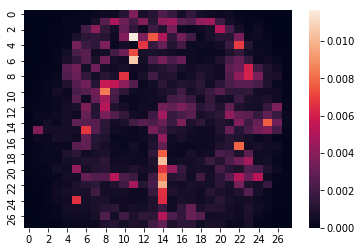

In [20]:
#feature importances

#imp_vals_extra = importances.reshape(28,28)
#plot_matrix(imp_vals_extra)

import seaborn as sns
importances = extra_clf.feature_importances_
sns.heatmap(importances.reshape(28,28))
plt.show()

In [21]:
#extra trees with n estimators 100
grid_search(ExtraTreesClassifier, X_train, y_train, 100)

OOB score:  0.5682333333333334  Max Features:  1  Max Depth:  1
OOB score:  0.6739833333333334  Max Features:  1  Max Depth:  4
OOB score:  0.7845  Max Features:  1  Max Depth:  16
OOB score:  0.8326833333333333  Max Features:  1  Max Depth:  64
OOB score:  0.8326  Max Features:  1  Max Depth:  None
OOB score:  0.5804666666666667  Max Features:  4  Max Depth:  1
OOB score:  0.7126833333333333  Max Features:  4  Max Depth:  4
OOB score:  0.82925  Max Features:  4  Max Depth:  16
OOB score:  0.8507833333333333  Max Features:  4  Max Depth:  64
OOB score:  0.8507833333333333  Max Features:  4  Max Depth:  None
OOB score:  0.4743  Max Features:  16  Max Depth:  1
OOB score:  0.7386833333333334  Max Features:  16  Max Depth:  4
OOB score:  0.8574166666666667  Max Features:  16  Max Depth:  16
OOB score:  0.86695  Max Features:  16  Max Depth:  64
OOB score:  0.86695  Max Features:  16  Max Depth:  None
OOB score:  0.39923333333333333  Max Features:  64  Max Depth:  1
OOB score:  0.746033333

In [22]:
extra2_clf=ExtraTreesClassifier(n_estimators=100,max_depth=None,max_features=64, n_jobs=-1, random_state=1314669)
extra2_clf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features=64, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=1314669, verbose=0,
           warm_start=False)

In [23]:
#compute and print accuracy for test set
extra2_pred=extra2_clf.predict(X_test)
print(extra2_pred)
accuracy3 = extra2_clf.score(X_test, y_test)
print("Accuracy: ",accuracy3)

[0 1 2 ... 8 8 1]
Accuracy:  0.8881


In [24]:
#confusion matrix
print(confusion_matrix(y_test, extra2_pred))

[[867   0  13  25   4   2  79   0  10   0]
 [  2 974   4  13   1   1   5   0   0   0]
 [ 12   1 816   8 105   0  52   0   6   0]
 [ 21   7   8 926  20   0  17   0   1   0]
 [  0   0  64  29 862   0  42   0   3   0]
 [  0   0   0   0   0 946   0  37   5  12]
 [167   1 105  27  67   0 619   0  14   0]
 [  0   0   0   0   0  17   0 941   0  42]
 [  1   1   6   0   3   2   7   2 978   0]
 [  0   0   0   0   0   9   0  38   1 952]]


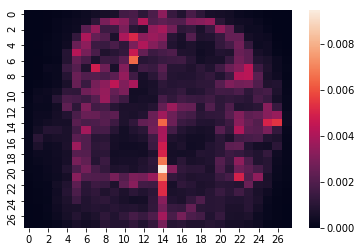

In [25]:
#feature importances
import seaborn as sns
importances = extra2_clf.feature_importances_
sns.heatmap(importances.reshape(28,28))
plt.show()
#imp_vals_extra2 = importances.reshape(28,28)
#plot_matrix(imp_vals_extra2)

# Discussion

- Regarding OOB scores, is the RandomForestClassifier better than the ExtraTreesClassifier?

      The ExtraTreesClassifier with 100 n_estimators seems to have the highest OOB score, with 0.8757. This is therefore the most accurate classifier.
      We did an ExtraTreesClassifier with 30 and also 100 just out of curiousity. 
      
- Is the OOB score for the RandomForestClassifier lower than its test-set accuracy?
        
        The OOB score for the RandomForestClassifier was 0.8648, which is lower than its test accuracy score of 0.877.
        
- Is the OOB score for the ExtraTreesClassifier lower than its test-set accuracy?

        The OOB score for the ExtraTreesClassifier was 0.8757, which is lower than its test accuracy score of 0.8794.
        
- If you use the OOB scores to choose the best classifier, is that consistent with the test-set accuracies?

        The OOB scores seem to be consistently lower than the test scores, however only slightly. This means that the test-set scores are more accurate, yet the OOB scores provide a decent representation.
- Do the feature_importances matrix plots make sense (explain)?

        It makes sense that on all our matrix plots there were little to no hot spots around the outside, this could be because there is white space around all the images of clothing and therefore it is impossible to distinguish the difference between them. Also, it is interesting to see on our results that there are a lot of single pixel hot spots, this could be due to different patterns and shapes on the clothing that the computer uses to distinguish between other matrixes. Our matrix are consistent in there appearence because the individual clothing images generally have some brighter / more textured pixels in the center. 